# Pandas
- 利用Python进行数据分析 第五章

In [7]:
from pandas import Series,DataFrame
# print dir(Series)
print '-----------------------------------------------------------------------------------------------------------'
# print dir(DataFrame)

-----------------------------------------------------------------------------------------------------------


In [1]:
import pandas as pd
print dir(pd)

['Categorical', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'ExcelFile', 'ExcelWriter', 'Expr', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int64Index', 'LooseVersion', 'MultiIndex', 'NaT', 'Panel', 'Panel4D', 'Period', 'PeriodIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseList', 'SparsePanel', 'SparseSeries', 'SparseTimeSeries', 'Term', 'TimeGrouper', 'TimeSeries', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'WidePanel', '__builtins__', '__doc__', '__docformat__', '__file__', '__name__', '__package__', '__path__', '__version__', '_np_version', '_np_version_under1p8', '_np_version_under1p9', '_period', '_sparse', '_testing', '_version', 'algos', 'bdate_range', 'compat', 'computation', 'concat', 'core', 'crosstab', 'cut', 'date_range', 'datetime', 'datetools', 'describe_option', 'eval', 'ewma', 'ewmcorr', 'ewmcov', 'ewmstd', 'ewmvar', 'ewmvol', 'expanding_apply', 'expanding_corr', 'expanding_corr_pairwise', 'expanding_count', 'expanding

In [1]:
from pandas import Series,DataFrame
import pandas as pd

import numpy as np
from IPython.display import Image

## 一、pandas 数据结构介绍
- 两个主要数据结构：Series、DataFrame

### 1 Series
- Series是一种类似于NumPy数组的对象，它由一组数据（各种NumPy数据类型）和与之相关的一组数据标签（即索引）组成的。
- 可以用index和values分别规定索引和值。如果不规定索引，会自动创建 0 到 N-1 索引。

In [11]:
obj = Series([4,7,-5,3])
print obj  # 索引在左边，值在右边
print obj.values # 获取其数组表示形式
print obj.index # 获取索引对象

0    4
1    7
2   -5
3    3
dtype: int64
[ 4  7 -5  3]
Int64Index([0, 1, 2, 3], dtype='int64')


In [30]:
obj = Series([4,7,-5,3],index = ['d','b','a','c'])
print obj  # 索引在左边，值在右边
print obj.index # 获取索引对象
obj.index = ['x','y','z','m'] # 修改Series对象的索引
print obj

d    4
b    7
a   -5
c    3
dtype: int64
Index([u'd', u'b', u'a', u'c'], dtype='object')
x    4
y    7
z   -5
m    3
dtype: int64


In [15]:
print obj['a'] # 通过索引获取单个值
obj['d'] = 6
print obj[['c','a','d']]  # 通过索引获取一组值

-5
c    3
a   -5
d    6
dtype: int64


In [19]:
print obj[obj>0]  # numpy数组运算都会保留索引和值之间的链接 # 布尔数组
print obj * 2  # 标量乘法
print np.exp(obj) # 数学函数

d    6
b    7
c    3
dtype: int64
d    12
b    14
a   -10
c     6
dtype: int64
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [24]:
print 'b' in obj # 将Series看成定长有序字典
print 'e' in obj

sdata = {'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3 = Series(sdata)  # 直接从Python字典数据，创建Series。如果只传入一个字典，索引就是原字典的键（有序排列）
print obj3

states = ['California','Ohio','Oregon','Texas']
obj4 = Series(sdata,index = states) # 没有California，所以显示NaN（pandas中表示缺失或NA值）
print obj4

True
False
Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64


In [26]:
print pd.isnull(obj4) # 检测缺失数据 是缺失值为True
print pd.notnull(obj4) # 不是缺失值为True

print obj4.isnull() # Series中自有方法

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [28]:
print obj3
print obj4
print obj3 + obj4 # 在算术运算中会自动对齐不同索引的数据

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64
California       NaN
Ohio           70000
Oregon         32000
Texas         142000
Utah             NaN
dtype: float64


In [29]:
obj4.name = 'population' # Series 对象本身及其索引都有一个name属性
obj4.index.name = 'state'
print obj4

state
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
Name: population, dtype: float64


### 2 DataFrame

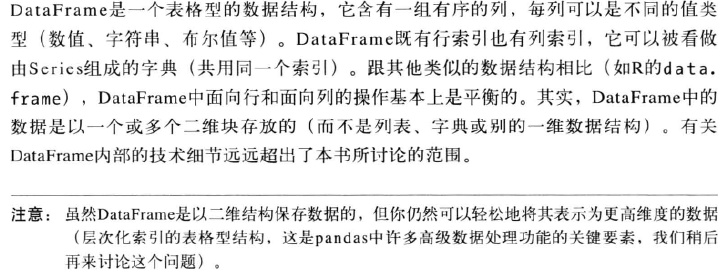

In [32]:
Image(filename="picture\DataFrame.png")

#### 2.1 由等长列表或NumPy数组组成的字典

In [2]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
       'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
       'wins': [11, 8, 10, 15, 11, 6, 10, 4],
       'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
frame = DataFrame(data) # 直接传入一个由等长列表或NumPy数组组成的字典
print frame # 自动加上索引，与Series一样，且全部列会被有序排列

   losses     team  wins  year
0       5    Bears    11  2010
1       8    Bears     8  2011
2       6    Bears    10  2012
3       1  Packers    15  2011
4       5  Packers    11  2012
5      10    Lions     6  2010
6       6    Lions    10  2011
7      12    Lions     4  2012


In [6]:
dir(data)

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [9]:
data.keys()

['losses', 'wins', 'team', 'year']

In [34]:
print DataFrame(data,columns = ['year','losses','wins']) # 指定排序列

   year  losses  wins
0  2010       5    11
1  2011       8     8
2  2012       6    10
3  2011       1    15
4  2012       5    11
5  2010      10     6
6  2011       6    10
7  2012      12     4


In [38]:
frame2 = DataFrame(data,columns=['year','team','wins','rate'],
                  index = ['one','two','three','four','five','six','seven','eight'])
print frame2 # 找不到的数据，显示为NA值

       year     team  wins rate
one    2010    Bears    11  NaN
two    2011    Bears     8  NaN
three  2012    Bears    10  NaN
four   2011  Packers    15  NaN
five   2012  Packers    11  NaN
six    2010    Lions     6  NaN
seven  2011    Lions    10  NaN
eight  2012    Lions     4  NaN


In [40]:
print frame2['year'] # 将DataFrame的列获取为一个Series
print frame2.team # 返回的Series拥有原来的索引，且name属性也被设置好了
print frame2.ix['three'] # 通过位置或名称的方式获取行数据

one      2010
two      2011
three    2012
four     2011
five     2012
six      2010
seven    2011
eight    2012
Name: year, dtype: int64
one        Bears
two        Bears
three      Bears
four     Packers
five     Packers
six        Lions
seven      Lions
eight      Lions
Name: team, dtype: object
year     2012
team    Bears
wins       10
rate      NaN
Name: three, dtype: object


In [43]:
frame2['rate'] = 0.59 # 通过赋值方式修改列值
print frame2
frame2['rate'] = np.arange(8.) # 通过赋值方式修改列值
print frame2

       year     team  wins  rate
one    2010    Bears    11  0.59
two    2011    Bears     8  0.59
three  2012    Bears    10  0.59
four   2011  Packers    15  0.59
five   2012  Packers    11  0.59
six    2010    Lions     6  0.59
seven  2011    Lions    10  0.59
eight  2012    Lions     4  0.59
       year     team  wins  rate
one    2010    Bears    11     0
two    2011    Bears     8     1
three  2012    Bears    10     2
four   2011  Packers    15     3
five   2012  Packers    11     4
six    2010    Lions     6     5
seven  2011    Lions    10     6
eight  2012    Lions     4     7


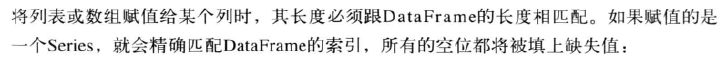

In [44]:
Image(filename="picture\DataFrame 2.png")

In [48]:
val = Series([-1.2,-1.5,-1.7],index=['two','four','six'])
frame2['RandNum'] = val # 为不存在的列赋值会创建新列
print frame2

del frame2['rate']
print frame2.columns # 通过索引方式返回的列只是相应数据的视图，而非副本。若改动，会反映到源数据上。

       year     team  wins  rate  RandNum
one    2010    Bears    11     0      NaN
two    2011    Bears     8     1     -1.2
three  2012    Bears    10     2      NaN
four   2011  Packers    15     3     -1.5
five   2012  Packers    11     4      NaN
six    2010    Lions     6     5     -1.7
seven  2011    Lions    10     6      NaN
eight  2012    Lions     4     7      NaN
Index([u'year', u'team', u'wins', u'RandNum'], dtype='object')


#### 2.2 嵌套字典（即字典的字典）

In [54]:
pop = {'Nevada':{2001:2.4,2002:2.9},
      'Ohio':{2000:1.5,2001:1.7,2002:3.6}}
frame3 = DataFrame(pop) # 外层字典的键作为列，内层键则作为行索引
print frame3

print frame3.T # 转置

print DataFrame(pop,index=[2001,2002,2003]) # 内层字典的键会被合并、排序已形成最终索引。如果指定索引就不一样了

frame3.index.name = 'year' # 设置DataFrame的index和columns的name属性
frame3.columns.name = 'state'
print frame3

      Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7
2002     2.9   3.6
        2000  2001  2002
Nevada   NaN   2.4   2.9
Ohio     1.5   1.7   3.6
      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003     NaN   NaN
state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6


In [56]:
print frame3.values # 以二维的形式返回DataFrame中的数据
print frame2.values # 如果各列数据类型不同，会选用兼容所有列的数据类型

[[ nan  1.5]
 [ 2.4  1.7]
 [ 2.9  3.6]]
[[2010L 'Bears' 11L nan]
 [2011L 'Bears' 8L -1.2]
 [2012L 'Bears' 10L nan]
 [2011L 'Packers' 15L -1.5]
 [2012L 'Packers' 11L nan]
 [2010L 'Lions' 6L -1.7]
 [2011L 'Lions' 10L nan]
 [2012L 'Lions' 4L nan]]


### 3 索引对象

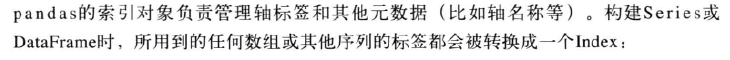

In [57]:
Image(filename="picture\Index Object.png")

In [58]:
obj = Series(range(3),index=['a','b','c'])
index = obj.index  # Index对象是不可修改的（immutable）
print index
print index[1:]

Index([u'a', u'b', u'c'], dtype='object')
Index([u'b', u'c'], dtype='object')


In [61]:
print frame3
print 'Ohio' in frame3.columns
print 2003 in frame3.index

state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6
True
False


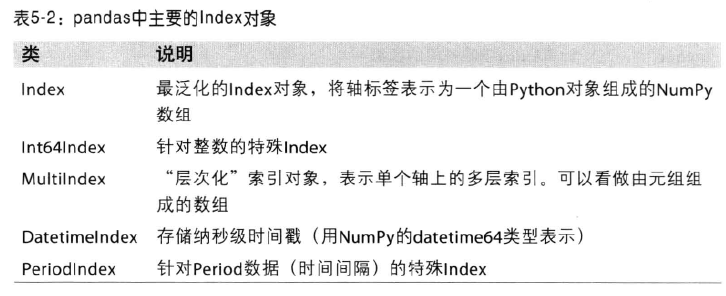

In [59]:
Image(filename="picture\Index Object 2.png")